In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
events = pd.read_csv('./JSON/pepe_all.csv')
events1 = pd.read_csv('./JSON/Arsenal_19-20/pepe_arse_all.csv')

In [4]:
mask = (events['X'] > 50)
half = events.loc[mask]
half

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
0,Pass,0,0.0,138477.0,347,Successful,50.1,50.1,41.9,64.3,OpenPlay,False,NaN
4,Pass,0,6.0,25599.0,347,Successful,65.4,7.0,63.5,13.8,OpenPlay,False,NaN
5,Pass,0,10.0,345661.0,347,Successful,62.6,9.2,46.0,4.1,OpenPlay,False,NaN
10,Aerial,0,21.0,25599.0,347,Unsuccessful,57.6,21.8,NaN,NaN,OpenPlay,False,NaN
13,BallTouch,0,23.0,25599.0,347,Successful,57.4,13.2,NaN,NaN,OpenPlay,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57576,Pass,92,44.0,317743.0,607,Unsuccessful,64.7,16.8,85.5,40.7,OpenPlay,False,NaN
57584,Aerial,93,19.0,19859.0,607,Unsuccessful,75.2,77.5,NaN,NaN,OpenPlay,False,NaN
57589,Pass,93,52.0,234365.0,614,Unsuccessful,63.7,0.0,87.6,5.3,ThrowIn,False,NaN
57590,Foul,93,55.0,344697.0,614,Unsuccessful,95.6,6.1,NaN,NaN,OpenPlay,False,NaN


In [5]:
mask = (events1['X'] > 50)
half1 = events1.loc[mask]
half1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
0,OffsideGiven,0,NaN,44120.0,13,Unsuccessful,89.9,24.2,NaN,NaN,OpenPlay,False,NaN
10,Pass,0,17.0,44120.0,13,Successful,67.4,17.0,64.6,20.9,OpenPlay,False,NaN
12,OffsidePass,0,19.0,342563.0,13,Successful,70.8,25.0,89.9,24.2,OpenPlay,False,NaN
18,Aerial,0,55.0,201755.0,23,Unsuccessful,53.6,31.6,NaN,NaN,OpenPlay,False,NaN
21,BallRecovery,0,58.0,342563.0,13,Successful,62.7,69.6,NaN,NaN,OpenPlay,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72470,Pass,94,54.0,93160.0,183,Unsuccessful,79.3,23.7,90.2,52.4,OpenPlay,False,NaN
72472,Pass,95,0.0,93160.0,183,Unsuccessful,65.1,3.8,68.4,5.3,OpenPlay,False,NaN
72474,Dispossessed,95,2.0,93160.0,183,Successful,65.9,6.1,NaN,NaN,OpenPlay,False,NaN
72477,BallTouch,95,9.0,44120.0,13,Unsuccessful,91.0,76.0,NaN,NaN,OpenPlay,False,NaN


In [6]:
half1.Event.value_counts()

Pass               21162
BallTouch           1675
Aerial              1359
BallRecovery        1265
TakeOn              1257
Foul                1063
SavedShot            590
Dispossessed         574
CornerAwarded        558
Tackle               467
MissedShots          444
Challenge            322
BlockedPass          273
Interception         248
OffsideGiven         157
Goal                 126
OffsidePass           98
ShotOnPost            22
GoodSkill              5
Clearance              2
Error                  2
OffsideProvoked        1
Name: Event, dtype: int64

In [7]:
mask=(half['Event']=='Pass') | (half['Event']=='BallTouch') | (half['Event']=='TakeOn') | (half['Event']=='GoodSkill')
df=half.loc[mask]
df

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
0,Pass,0,0.0,138477.0,347,Successful,50.1,50.1,41.9,64.3,OpenPlay,False,NaN
4,Pass,0,6.0,25599.0,347,Successful,65.4,7.0,63.5,13.8,OpenPlay,False,NaN
5,Pass,0,10.0,345661.0,347,Successful,62.6,9.2,46.0,4.1,OpenPlay,False,NaN
13,BallTouch,0,23.0,25599.0,347,Successful,57.4,13.2,NaN,NaN,OpenPlay,False,NaN
20,Pass,0,33.0,345661.0,347,Successful,62.4,8.3,79.7,3.1,OpenPlay,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57569,Pass,92,5.0,128361.0,614,Unsuccessful,54.3,40.3,63.2,62.6,OpenPlay,False,NaN
57572,TakeOn,92,11.0,239872.0,607,Unsuccessful,64.6,12.8,NaN,NaN,OpenPlay,False,NaN
57576,Pass,92,44.0,317743.0,607,Unsuccessful,64.7,16.8,85.5,40.7,OpenPlay,False,NaN
57589,Pass,93,52.0,234365.0,614,Unsuccessful,63.7,0.0,87.6,5.3,ThrowIn,False,NaN


In [8]:
mask=(half1['Event']=='Pass') | (half1['Event']=='BallTouch') | (half1['Event']=='TakeOn') | (half1['Event']=='GoodSkill')
df1=half1.loc[mask]
df1

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Assist,Assist_2nd
10,Pass,0,17.0,44120.0,13,Successful,67.4,17.0,64.6,20.9,OpenPlay,False,NaN
22,Pass,0,59.0,342563.0,13,Unsuccessful,62.7,69.6,62.8,71.5,OpenPlay,False,NaN
31,Pass,1,23.0,136356.0,23,Successful,56.0,4.7,69.4,7.4,OpenPlay,False,NaN
32,TakeOn,1,27.0,303924.0,23,Unsuccessful,75.7,8.9,NaN,NaN,OpenPlay,False,NaN
39,Pass,1,58.0,82726.0,23,Successful,61.8,28.6,72.5,37.1,OpenPlay,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72468,BallTouch,94,45.0,328983.0,13,Successful,61.0,6.9,NaN,NaN,OpenPlay,False,NaN
72469,Pass,94,50.0,133464.0,183,Successful,54.1,55.5,66.2,16.5,OpenPlay,False,NaN
72470,Pass,94,54.0,93160.0,183,Unsuccessful,79.3,23.7,90.2,52.4,OpenPlay,False,NaN
72472,Pass,95,0.0,93160.0,183,Unsuccessful,65.1,3.8,68.4,5.3,OpenPlay,False,NaN


In [17]:
cmap = ListedColormap(['#313332', '#5b433d', '#714237', '#874131', '#874131', '#c5311d'])

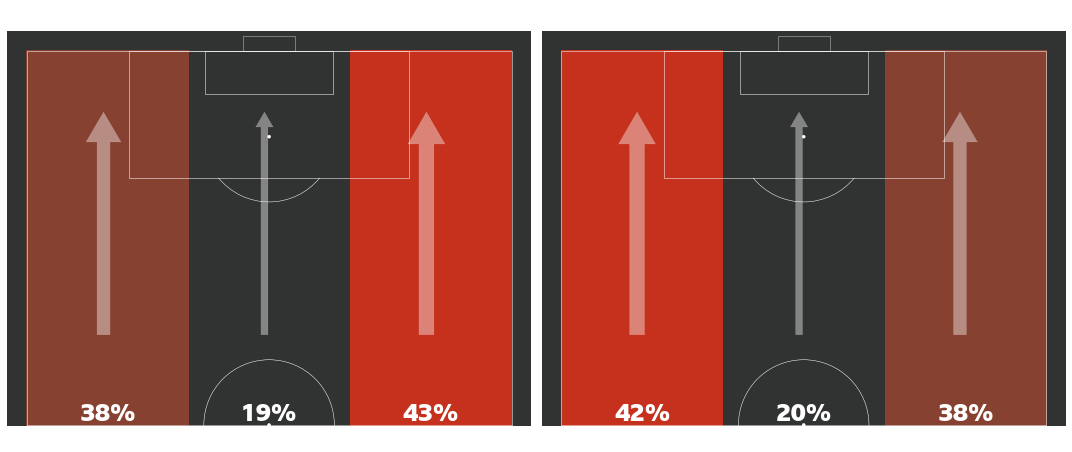

In [18]:
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}
background = "#313332"
line = 'white'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"

# setup pitch
pitch = Pitch(pitch_type='opta', figsize=(15, 15), layout=(1, 2), line_zorder=2,goal_type='box',linewidth=0.5,
#               axis=True, label=True, tick=True,
              pitch_color=background, line_color=line, orientation='vertical', view='half',pad_bottom=0.3)
# draw
fig, ax = pitch.draw()
# heatmap specified by (nx, ny) for horizontal pitch
bins = [(1, 3)]
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(df.X, df.Y, statistic='count', bins=bin)
    # draw
    pitch.heatmap(bin_statistic, ax=ax[0], cmap=cmap, edgecolors=None)
    # replace raw counts with percentages and add percentage sign (note immutable named tuple so used _replace)
    bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                  .applymap(lambda x: '{:.0%}'.format(x))
                                  .values)
    pitch.label_heatmap(bin_statistic, color='white', fontsize=25, ax=ax[0], ha='center', va='bottom',**csfont, fontweight='bold')
    

# heatmap specified by (nx, ny) for horizontal pitch
bins = [(1, 3)]
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(df1.X, df1.Y, statistic='count', bins=bin)
    # draw
    pitch.heatmap(bin_statistic, ax=ax[1], cmap=cmap, edgecolors=None)
    # replace raw counts with percentages and add percentage sign (note immutable named tuple so used _replace)
    bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                  .applymap(lambda x: '{:.0%}'.format(x))
                                  .values)
    pitch.label_heatmap(bin_statistic, color='white', fontsize=25, ax=ax[1], ha='center', va='bottom',**csfont, fontweight='bold')

    
ax[0].text(50,104,"Lille OSC | Ligue 1 | 2018/2019",fontweight="bold", fontsize=18,fontfamily=title_font, color=text_color,ha="center")
ax[1].text(50,104,"Arsenal | English Premier League | 2019/2020",fontweight="bold", fontsize=18,fontfamily=title_font, color=text_color,ha="center")

#arrow
arrow="Simple,tail_width=1.3,head_width=3.5,head_length=3"
ax2 = fig.add_axes([0.08,0.4,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.4))

arrow="Simple,tail_width=0.7,head_width=1.75,head_length=1.5"
ax2 = fig.add_axes([0.229,0.4,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.4))

arrow="Simple,tail_width=1.5,head_width=3.7,head_length=3.2"
ax2 = fig.add_axes([0.379,0.4,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.4))

#arrow
arrow="Simple,tail_width=1.5,head_width=3.7,head_length=3.2"
ax2 = fig.add_axes([0.574,0.4,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.4))
arrow="Simple,tail_width=0.7,head_width=1.75,head_length=1.5"
ax2 = fig.add_axes([0.724,0.4,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.4))

arrow="Simple,tail_width=1.3,head_width=3.5,head_length=3"
ax2 = fig.add_axes([0.873,0.4,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.4))

info_string = '@jonollington'
fig.text(0.89, 0.3, info_string, color='#ffffff', ha='left', va='bottom', fontsize=13, **csfont)



plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("vertical-heatmap",bbox_inches="tight",dpi=500);